In [83]:
### import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## [Link to dataset](https://www.google.com/url?q=https://www.kaggle.com/datasets/imranbukhari/comprehensive-ethusd-1m-data/data&sa=D&source=docs&ust=1730502587695059&usg=AOvVaw3kMqZe-yQhr2LT-L_PQyeM)

### Some data preparation steps were done in `setup.ipynb`

In [84]:
#load dataset
df = pd.read_csv('ethereum_data.csv')
df

,Open time,Open,High,Low,Volume,Close
0,2023-01-01 00:00:00,1196.13,1196.69,1194.90,1082.447100,1196.13
1,2023-01-01 00:10:00,1195.38,1195.98,1194.31,911.956300,1195.42
2,2023-01-01 00:20:00,1195.98,1196.70,1195.97,555.142200,1196.04
3,2023-01-01 00:30:00,1196.62,1196.62,1192.72,1858.116200,1196.27
4,2023-01-01 00:40:00,1194.22,1195.06,1193.02,962.942700,1193.97
...,...,...,...,...,...,...
349824,2023-12-31 23:10:00,2283.34,2283.71,2276.20,1703.749316,2281.52
349825,2023-12-31 23:20:00,2277.86,2279.05,2274.44,649.731206,2276.67
349826,2023-12-31 23:30:00,2277.81,2280.27,2276.61,267.279837,2276.97
349827,2023-12-31 23:40:00,2279.72,2284.10,2279.23,298.685893,2279.83


In [85]:
# Shape of data
print(f'shape of data: {df.shape}')

shape of data: (349829, 6)


In [86]:
# change in price feature
df = df.assign(Change=df['Close']- df['Open'])
df

,Open time,Open,High,Low,Volume,Close,Change
0,2023-01-01 00:00:00,1196.13,1196.69,1194.90,1082.447100,1196.13,0.00
1,2023-01-01 00:10:00,1195.38,1195.98,1194.31,911.956300,1195.42,0.04
2,2023-01-01 00:20:00,1195.98,1196.70,1195.97,555.142200,1196.04,0.06
3,2023-01-01 00:30:00,1196.62,1196.62,1192.72,1858.116200,1196.27,-0.35
4,2023-01-01 00:40:00,1194.22,1195.06,1193.02,962.942700,1193.97,-0.25
...,...,...,...,...,...,...,...
349824,2023-12-31 23:10:00,2283.34,2283.71,2276.20,1703.749316,2281.52,-1.82
349825,2023-12-31 23:20:00,2277.86,2279.05,2274.44,649.731206,2276.67,-1.19
349826,2023-12-31 23:30:00,2277.81,2280.27,2276.61,267.279837,2276.97,-0.84
349827,2023-12-31 23:40:00,2279.72,2284.10,2279.23,298.685893,2279.83,0.11


In [87]:
#creating an info table for summary of dataset
descriptions = [
    'The timestamp, in UTC date format, when the candlestick (price bar) opens.',
    'The price of the asset at the beginning of the trading period.',
    'The highest price of the asset during the trading period.',
    'The lowest price of the asset during the trading period.',
    'The price of the asset at the end of the trading period.',
    'The price of the asset at the end of the trading period.',
    'The change in price of the asset between the start and end of the trading period.'
]


info_table = pd.DataFrame({
    "Data Type": df.dtypes,
    "Null Count": df.isna().sum(),
    'Description': descriptions
})

info_table

,Data Type,Null Count,Description
Open time,object,0,"The timestamp, in UTC date format, when the ca..."
Open,float64,0,The price of the asset at the beginning of the...
High,float64,0,The highest price of the asset during the trad...
Low,float64,0,The lowest price of the asset during the tradi...
Volume,float64,0,The price of the asset at the end of the tradi...
Close,float64,0,The price of the asset at the end of the tradi...
Change,float64,0,The change in price of the asset between the s...


## Distribution Graphs

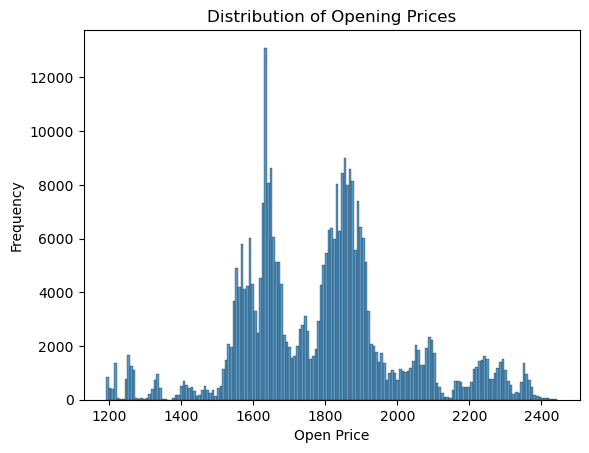

In [88]:
sns.histplot(data= df, x = 'Open')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()

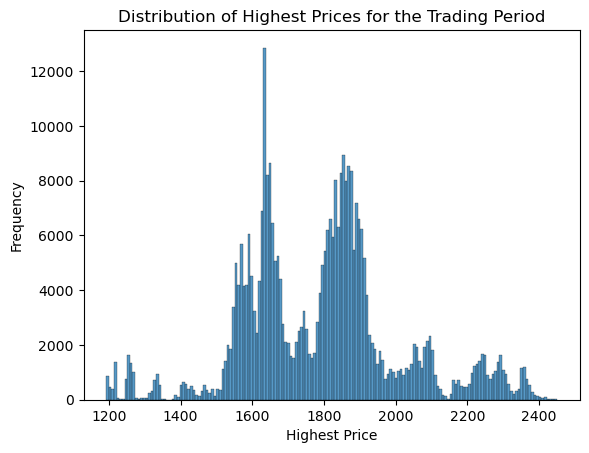

In [89]:
sns.histplot(data= df, x = 'High')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Highest Prices for the Trading Period')
plt.show()

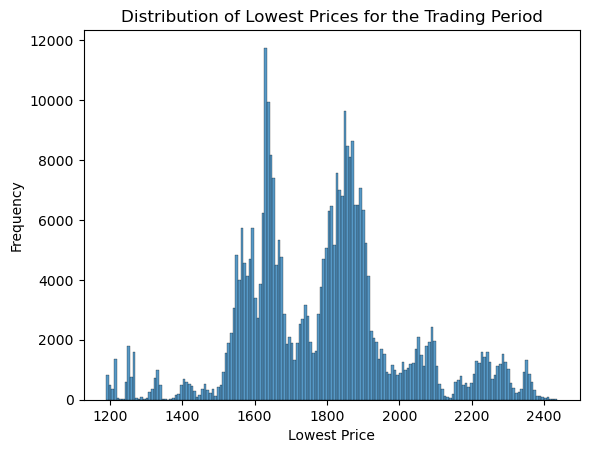

In [90]:
sns.histplot(data= df, x = 'Low')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.title('Distribution of Lowest Prices for the Trading Period')
plt.show()

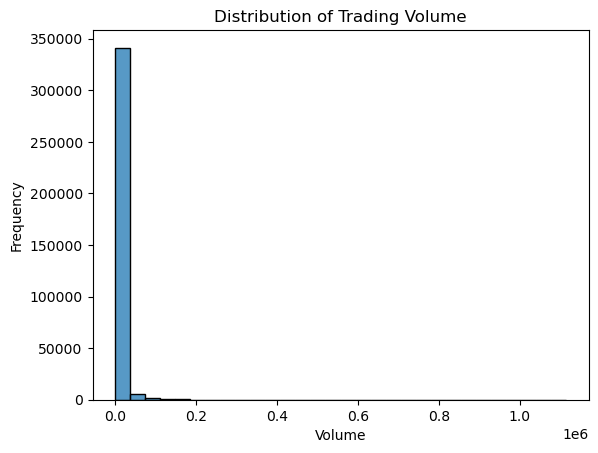

In [91]:
sns.histplot(data= df, x = 'Volume', bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

## Data Preprocessing

### More data preprocessing was done in a separate notebook `setup.ipynb`

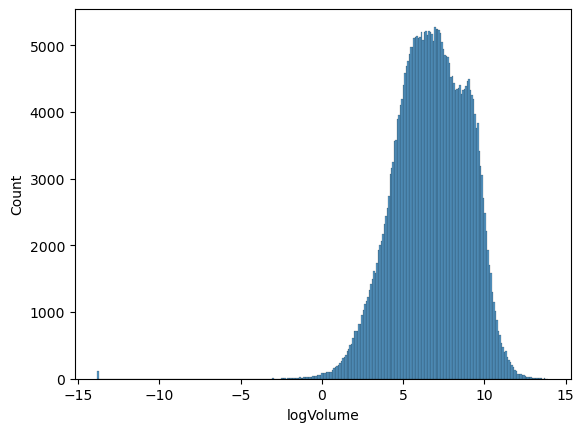

In [92]:
#applying a logarithmic transformation to volume column
df['logVolume'] = np.log(df['Volume'] + 0.000001)
df = df.drop(columns = ['Volume'])
sns.histplot(data=df, x = 'logVolume')
plt.show()

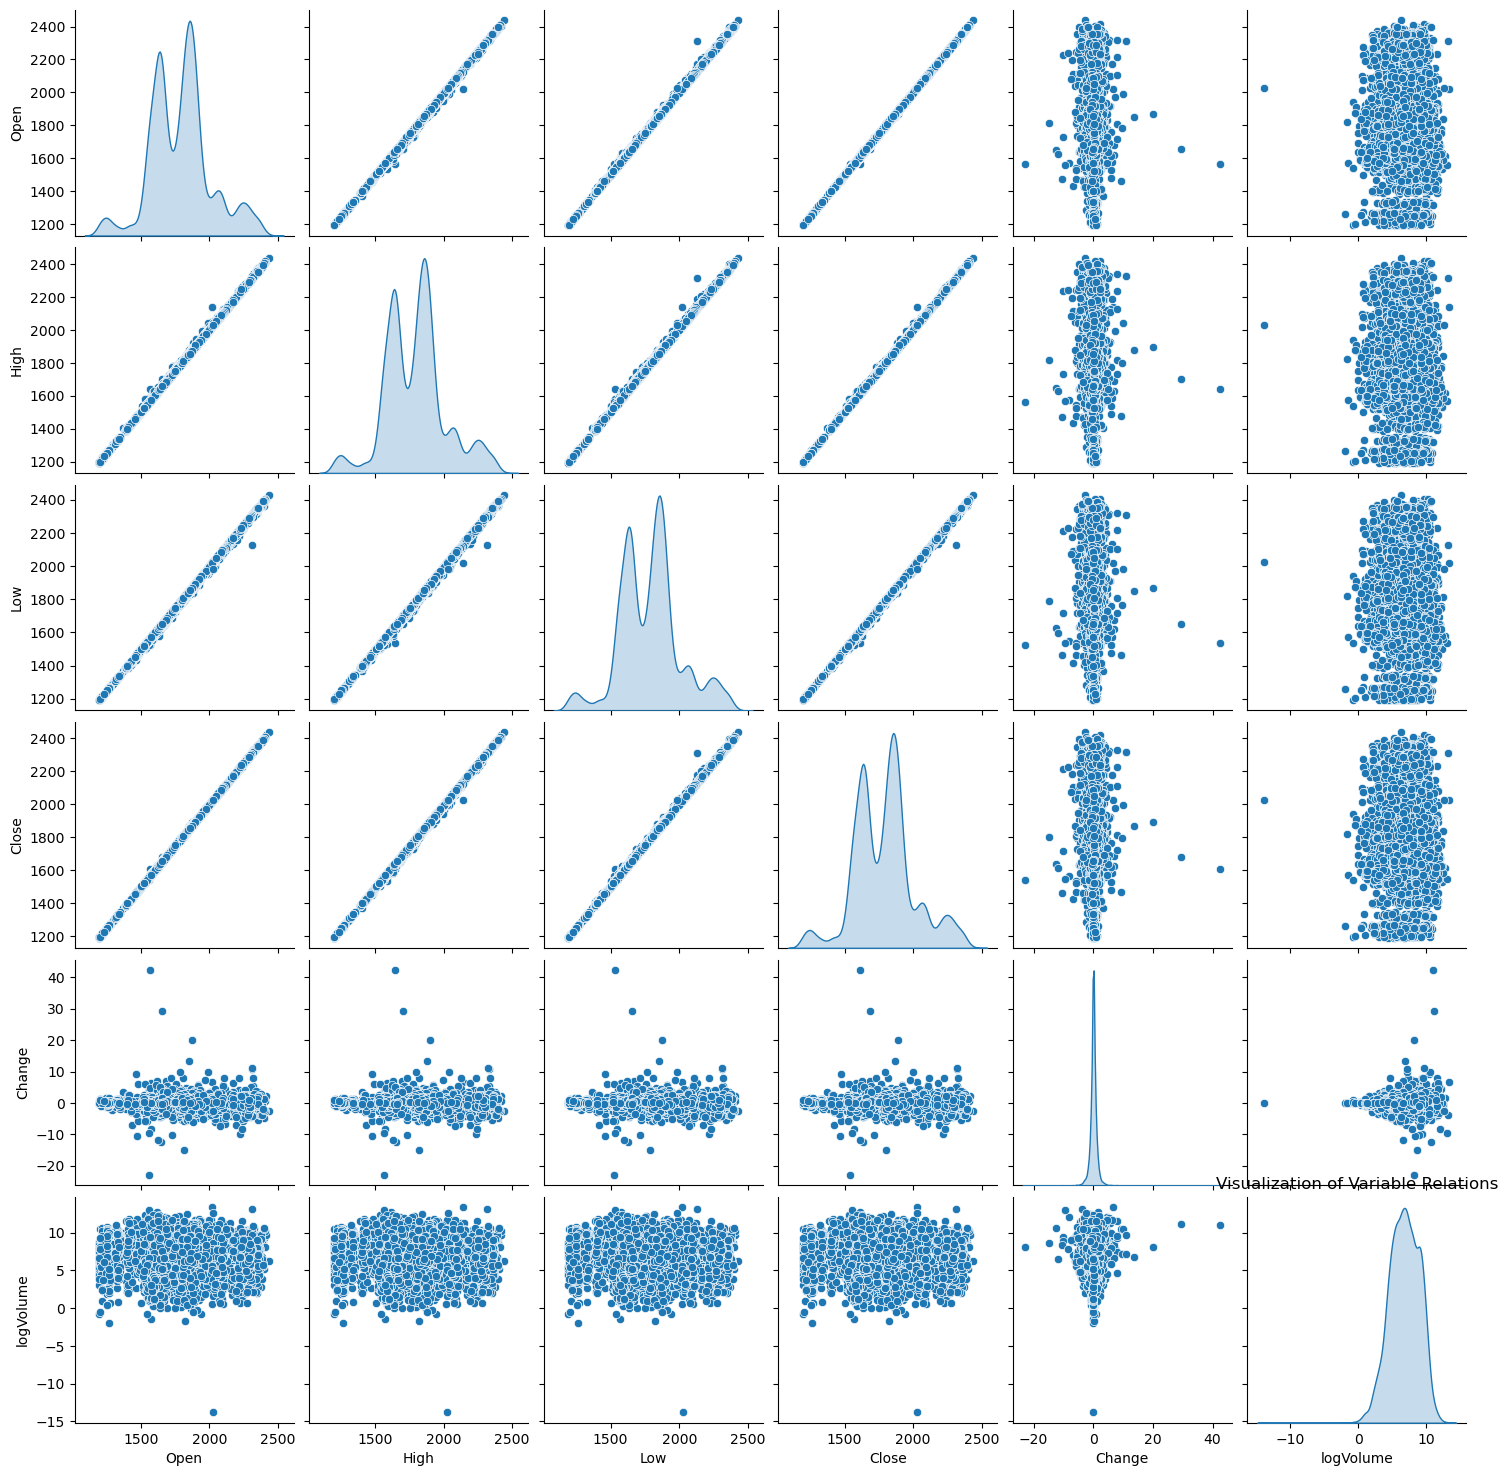

In [93]:
# pair plot visualization to explore the relationships between variables
df_sampled = df.sample(n=10000, random_state=1)
sns.pairplot(df_sampled.drop(columns=['Open time']), diag_kind='kde')
plt.title('Visualization of Variable Relations')
plt.show()

Our pairplot shows that the only features that have good linear correlation with `Close` are `Open`, `High`, and `Low`. This makes sense because the closing price should not be too far off from these other prices.

In [94]:
#scales the numeric columns / normalize
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['Open','High','Low','Change','logVolume']
scaler = MinMaxScaler()
numeric_df = df.drop(columns = ['Close']).select_dtypes(include=[float, int])
scaled_data = scaler.fit_transform(numeric_df)
df[numeric_df.columns] = scaled_data

df

,Open time,Open,High,Low,Close,Change,logVolume
0,2023-01-01 00:00:00,0.003897,0.003647,0.003908,1196.13,0.417895,0.749928
1,2023-01-01 00:10:00,0.003298,0.003083,0.003435,1195.42,0.418401,0.743750
2,2023-01-01 00:20:00,0.003777,0.003655,0.004767,1196.04,0.418654,0.725856
3,2023-01-01 00:30:00,0.004288,0.003591,0.002159,1196.27,0.413471,0.769407
4,2023-01-01 00:40:00,0.002372,0.002352,0.002399,1193.97,0.414735,0.745711
...,...,...,...,...,...,...,...
349824,2023-12-31 23:10:00,0.872067,0.867252,0.871607,2281.52,0.394890,0.766281
349825,2023-12-31 23:20:00,0.867691,0.863550,0.870194,2276.67,0.402853,0.731527
349826,2023-12-31 23:30:00,0.867652,0.864519,0.871936,2276.97,0.407277,0.699506
349827,2023-12-31 23:40:00,0.869177,0.867562,0.874038,2279.83,0.419286,0.703511


### Model 1: Polynomial Regression

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = df[['Open', 'High', 'Low', 'logVolume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

poly = PolynomialFeatures(degree=2, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

train_pred = model.predict(X_train_poly)
test_pred = model.predict(X_test_poly)
train_error = mean_squared_error(y_train, train_pred)
test_error = mean_squared_error(y_test, test_pred)

close_std = df['Close'].std()
train_error_stds = train_error / close_std
test_error_stds = test_error / close_std

print(f'train error: {train_error}, train error in stds: {train_error_stds}')
print(f'test error: {test_error}, test error in stds: {test_error_stds}')

train error: 1.156569378897389, train error in stds: 0.005251300444615791
test error: 1.1931740078038415, test error in stds: 0.005417500507974467


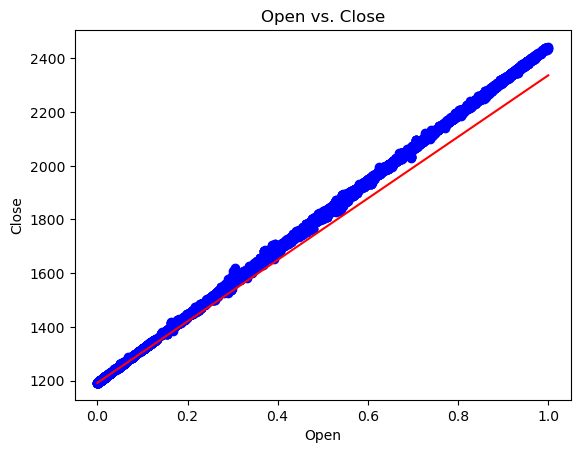

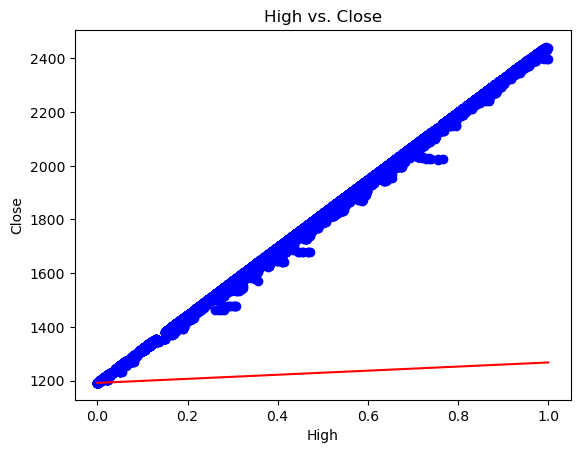

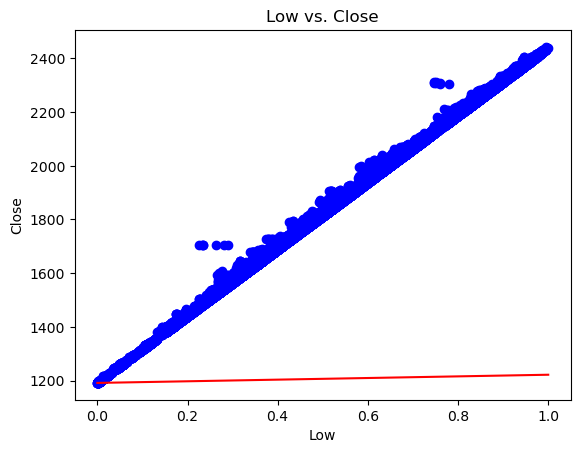

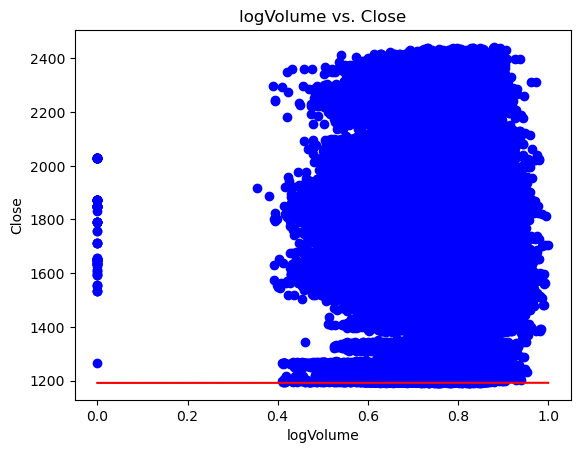

In [96]:
coefficients = model.coef_
intercept = model.intercept_

for i in range(len(X.columns)):
    col = X.columns[i]
    x_line = np.linspace(min(X[col]), max(X[col]), 100)  
    y_line = coefficients[i] * x_line + intercept  
    plt.plot(x_line, y_line, color='red', label='Regression Line')
    plt.scatter(X[col], y, color='blue', label='Data Points')
    plt.xlabel(col)
    plt.ylabel('Close')
    plt.title(f'{col} vs. Close')
    plt.show()

### Fitting Graph for Model 1

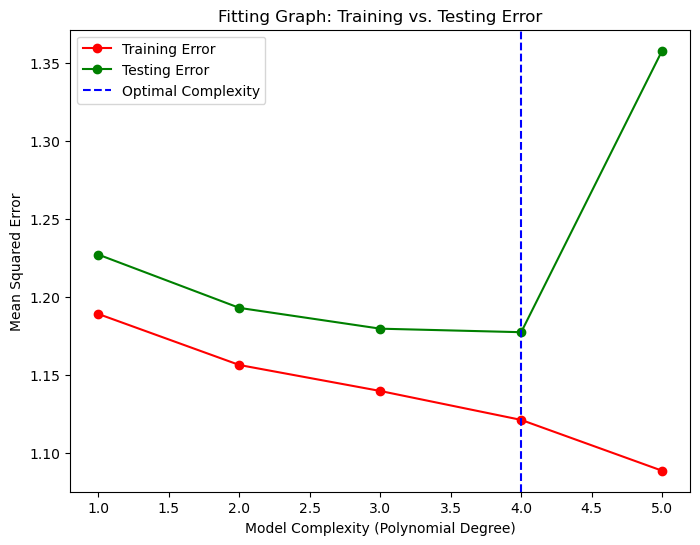

In [97]:
degrees = [1,2,3,4,5]
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='red')
plt.plot(degrees, test_errors, label='Testing Error', marker='o', color='green')
plt.axvline(x=np.argmin(test_errors) + 1, linestyle='--', color='blue', label='Optimal Complexity')

plt.title('Fitting Graph: Training vs. Testing Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

Our current model seems to perform fairly well with our test MSE being 0.005 standard devations of `Close`. Our model also seems to be fairly simple because our training error is only slightly lower than our testing error.

We could further improve our regression model by exploring more complicated and compound features. We could investigate whether combining volume traded with other features will produce stronger features. In addition, we can explore other regression models such as Ridge or Lasso regression and use cross validation as our evaluation metric.

Another model we plan to use is a classification model. As we created the change in price column, we plan to classify them by negative or positive change, instead of predicting the closing value. This will allow us to learn more about our data, and give us insight about market behavior. This would also give us results that are easy to interpret. We may also try a decision trees model, as this would be very easy to interpret at each decision node and would be resistant to any outliers we may have. 


Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

Our first model obtained an mse of 0.86, (explain what it means). In order to improve it, we may need to create new features that combine the ones already present. We could also use k-fold validation in order to gain a robust model that takes into account all of the data.

### Model 2: Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Open', 'High', 'Low', 'Change', 'logVolume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Fine-tuned Model

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

param_dist = {
    'max_depth': [1, 2, 3, 5, 10, None], 
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20],  
}

regressor = DecisionTreeRegressor(random_state=42)

random_search = RandomizedSearchCV(
    regressor,
    param_distributions=param_dist,
    n_iter=10,  
    random_state=42,
    cv=5, 
    scoring='neg_mean_squared_error',  
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)

y_pred = random_search.predict(X_test)

print("Best Validation Score (MSE): ", -random_search.best_score_)

mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

best_model = random_search.best_estimator_
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Best Hyperparameters:  {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': None}
Best Validation Score (MSE):  0.3339167292886311
Test MSE: 0.27027815207059513
Open: 0.9987023832638675
High: 2.261463708806432e-06
Low: 0.0012703275822332815
Change: 2.5025064276757086e-05
logVolume: 2.62591365155301e-09


In [100]:
from sklearn.metrics import mean_squared_error

y_train_pred = random_search.predict(X_train)

y_test_pred = random_search.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Test Mean Squared Error (MSE): {test_mse}')

Training Mean Squared Error (MSE): 0.1866278016963567
Test Mean Squared Error (MSE): 0.27027815207059513


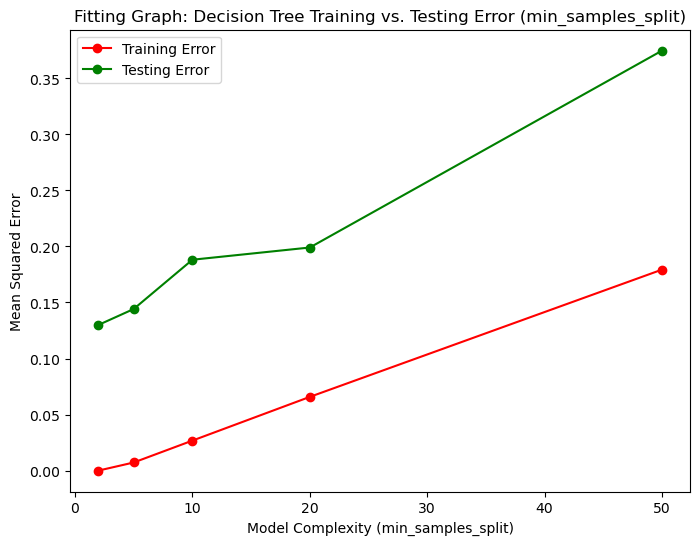

In [101]:
min_samples_splits = [2, 5, 10, 20, 50]  
train_errors = []
test_errors = []

for min_samples in min_samples_splits:
    
    model = DecisionTreeRegressor(min_samples_split=min_samples, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the fitting graph
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_errors, label='Training Error', marker='o', color='red')
plt.plot(min_samples_splits, test_errors, label='Testing Error', marker='o', color='green')

plt.title('Fitting Graph: Decision Tree Training vs. Testing Error (min_samples_split)')
plt.xlabel('Model Complexity (min_samples_split)')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.show()

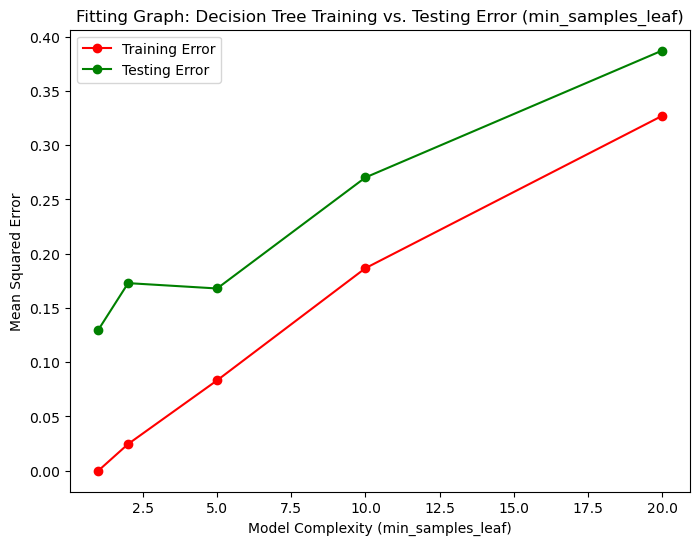

In [102]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

min_samples_leaves = [1, 2, 5, 10, 20]  
train_errors = []
test_errors = []

for min_samples in min_samples_leaves:
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaves, train_errors, label='Training Error', marker='o', color='red')
plt.plot(min_samples_leaves, test_errors, label='Testing Error', marker='o', color='green')

plt.title('Fitting Graph: Decision Tree Training vs. Testing Error (min_samples_leaf)')
plt.xlabel('Model Complexity (min_samples_leaf)')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.show()

Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

For both the parameters min sample leaf and min sample split, our model fits at the optimal value as we performed randomized search cv, allowing us to determine that the optimal value for both. Therefore, our model fits in the fitting graph at the lowest train and test mean squared error.


Conclusion section: What is the conclusion of your 2nd model? What can be done to possibly improve it?

For our second model, the training MSE was a lot lower than the testing MSE which means that our model was overfiting to the training data. To improve to improve this model, we could do feature selection and only include the most important features. In our model, we tested the importance of each feature and the most important features were found to be 'Open' and 'Low' so we could try performing the model on only those two features to see if it will help with the overfitting. 

Evaluation of our model:

Our best model with a cross validation score of `0.3339167292886311` (MSE) scored a `0.27027815207059513` (MSE) on the test dataset.